### 1. Import Libraries

In [41]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

### 2. Read The Training Data

In [42]:
file_path=r"C:\Users\vinay\OneDrive\Desktop\flights-sagemaker-project\Data\train.csv"
train=pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Spicejet,2019-06-03,Kolkata,Banglore,17:10:00,19:40:00,150,0.0,No check-in baggage included,3841
1,Spicejet,2019-06-12,Kolkata,Banglore,15:05:00,20:20:00,315,1.0,No Info,4649
2,Jet Airways,2019-04-06,Banglore,Delhi,19:50:00,22:50:00,180,0.0,No Info,7229
3,Multiple Carriers,2019-06-15,Delhi,Cochin,13:00:00,19:15:00,375,1.0,No Info,16108
4,Jet Airways,2019-03-24,Kolkata,Banglore,18:55:00,16:20:00,1285,1.0,No Info,14231
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-05-18,Delhi,Cochin,20:30:00,23:00:00,1590,1.0,No Info,8907
636,Jet Airways,2019-05-06,Kolkata,Banglore,17:00:00,15:05:00,1325,1.0,No Info,13067
637,Spicejet,2019-05-18,Kolkata,Banglore,11:35:00,18:50:00,435,1.0,No Info,8479
638,Goair,2019-03-24,Kolkata,Banglore,16:25:00,00:05:00,460,1.0,No Info,10198


In [43]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [44]:
train=train.assign(**{
    col: pd.to_datetime(train.loc[:,col],format="mixed")
    for col in ["date_of_journey","dep_time","arrival_time"]
})
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

### 3. High Level Summary Of Data

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [46]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,623.710938,0.834375,8931.481250
std,492.027458,0.671862,4323.239228
min,75.000000,0.000000,1965.000000
25%,170.000000,0.000000,5376.750000
50%,502.500000,1.000000,8099.000000
75%,886.250000,1.000000,12316.500000
max,2820.000000,3.000000,35185.000000


In [47]:
(
    train
    .assign(total_stops=train["total_stops"].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,3
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,230,292,292,340.0,499


### 4. High Level Analysis Of Missing Values

In [48]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


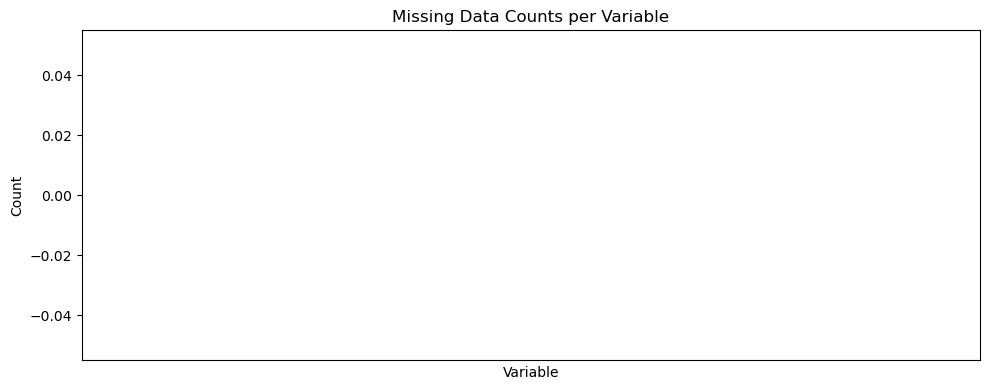

In [49]:
eda_helper_functions.plot_missing_info(train)

### 5. High-Level Analysis Of Outliers

In [50]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [51]:
(
    train
    .assign(outlier = forest.fit_predict(train
        .drop(columns = "price")
        .select_dtypes(include ="number")))
    .query("outlier == -1")
    #.duration
    #.describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
3,Multiple Carriers,2019-06-15,Delhi,Cochin,2025-09-13 13:00:00,2025-09-13 19:15:00,375,1.0,No Info,16108,-1
9,Vistara,2019-04-21,Delhi,Cochin,2025-09-13 14:40:00,2025-09-13 17:50:00,190,0.0,No Info,6741,-1
11,Jet Airways,2019-05-21,Delhi,Cochin,2025-09-13 05:30:00,2025-09-13 12:35:00,425,2.0,No Info,16274,-1
12,Jet Airways,2019-06-21,Delhi,Cochin,2025-09-13 11:00:00,2025-09-13 14:15:00,195,0.0,No Info,9564,-1
17,Air India,2019-06-21,Chennai,Kolkata,2025-09-13 11:40:00,2025-09-13 13:55:00,135,0.0,No Info,4667,-1
...,...,...,...,...,...,...,...,...,...,...,...
626,Jet Airways,2019-03-18,Banglore,New Delhi,2025-09-13 08:55:00,2025-09-13 15:55:00,420,2.0,In-flight meal not included,11245,-1
631,Air India,2019-05-18,Kolkata,Banglore,2025-09-13 09:25:00,2025-09-13 18:20:00,535,2.0,No Info,8366,-1
635,Air India,2019-05-18,Delhi,Cochin,2025-09-13 20:30:00,2025-09-13 23:00:00,1590,1.0,No Info,8907,-1
636,Jet Airways,2019-05-06,Kolkata,Banglore,2025-09-13 17:00:00,2025-09-13 15:05:00,1325,1.0,No Info,13067,-1


### 6. Pair Plots

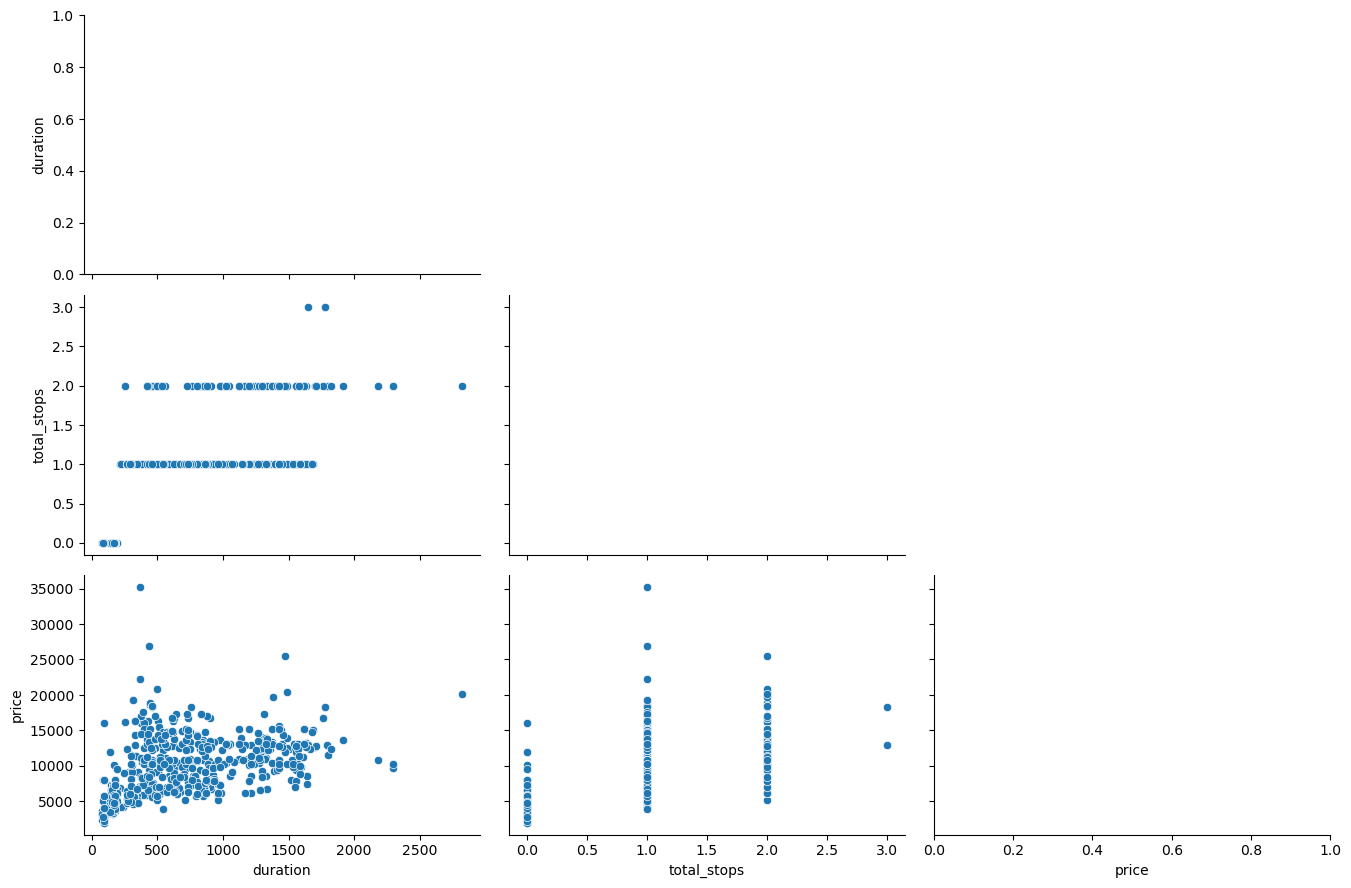

In [52]:
eda_helper_functions.pair_plots(train)

### 7.Correlation Analysis

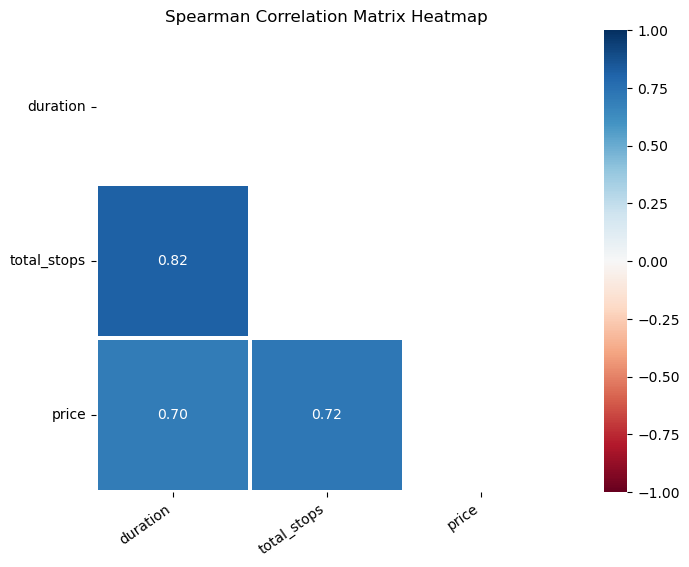

In [53]:
eda_helper_functions.correlation_heatmap(train)

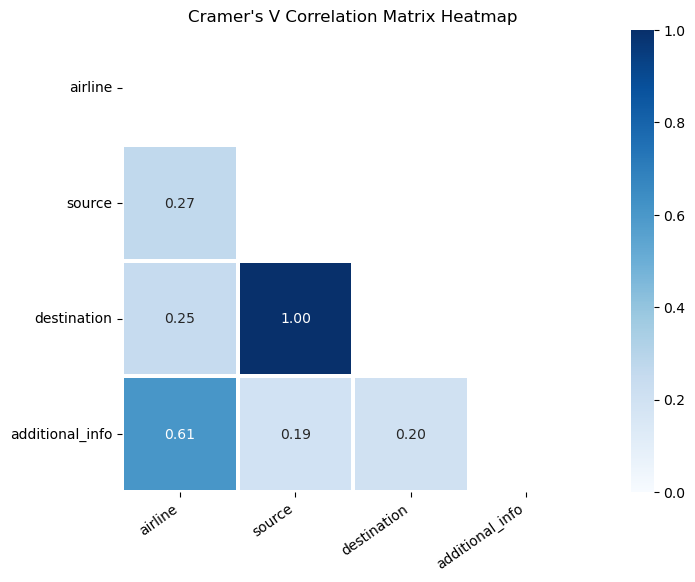

In [54]:
 eda_helper_functions.cramersV_heatmap(train)

### 8.Detailed Analysis

In [55]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 Airline

In [56]:
train.airline

0               Spicejet
1               Spicejet
2            Jet Airways
3      Multiple Carriers
4            Jet Airways
             ...        
635            Air India
636          Jet Airways
637             Spicejet
638                Goair
639            Air India
Name: airline, Length: 640, dtype: object

In [57]:
eda_helper_functions.cat_summary(train,"airline")

0               Spicejet
1               Spicejet
2            Jet Airways
3      Multiple Carriers
4            Jet Airways
             ...        
635            Air India
636          Jet Airways
637             Spicejet
638                Goair
639            Air India
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,230


,count,percentage
category,,
Jet Airways,230,0.359375
Indigo,118,0.184375
Air India,88,0.137500
Multiple Carriers,86,0.134375
Spicejet,55,0.085938
Vistara,29,0.045312
Air Asia,22,0.034375
Goair,12,0.018750


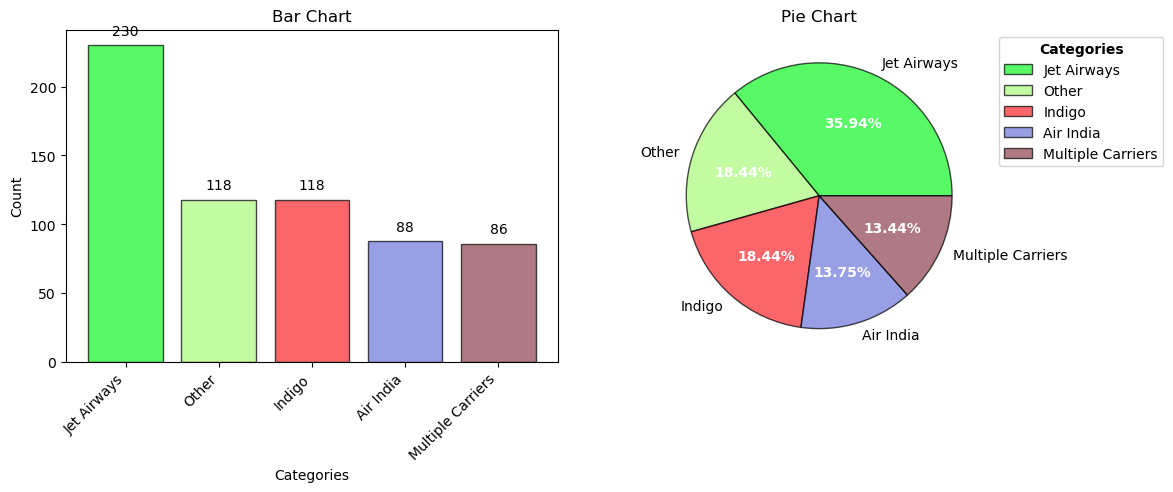

In [58]:
eda_helper_functions.cat_univar_plots(train,"airline",show_wordcloud=False,k=4)

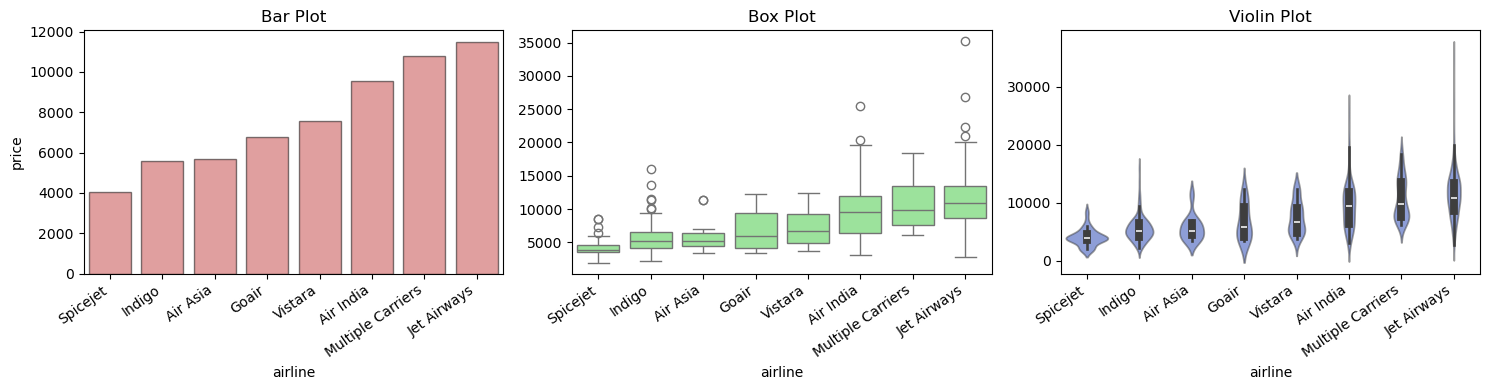

In [59]:
eda_helper_functions.num_cat_bivar_plots(train,"price","airline")

In [60]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 60.73086884718669
- p-value              : 1.424049170520042e-66
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 308.87180651831085
- p-value              : 7.703273657994698e-63
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


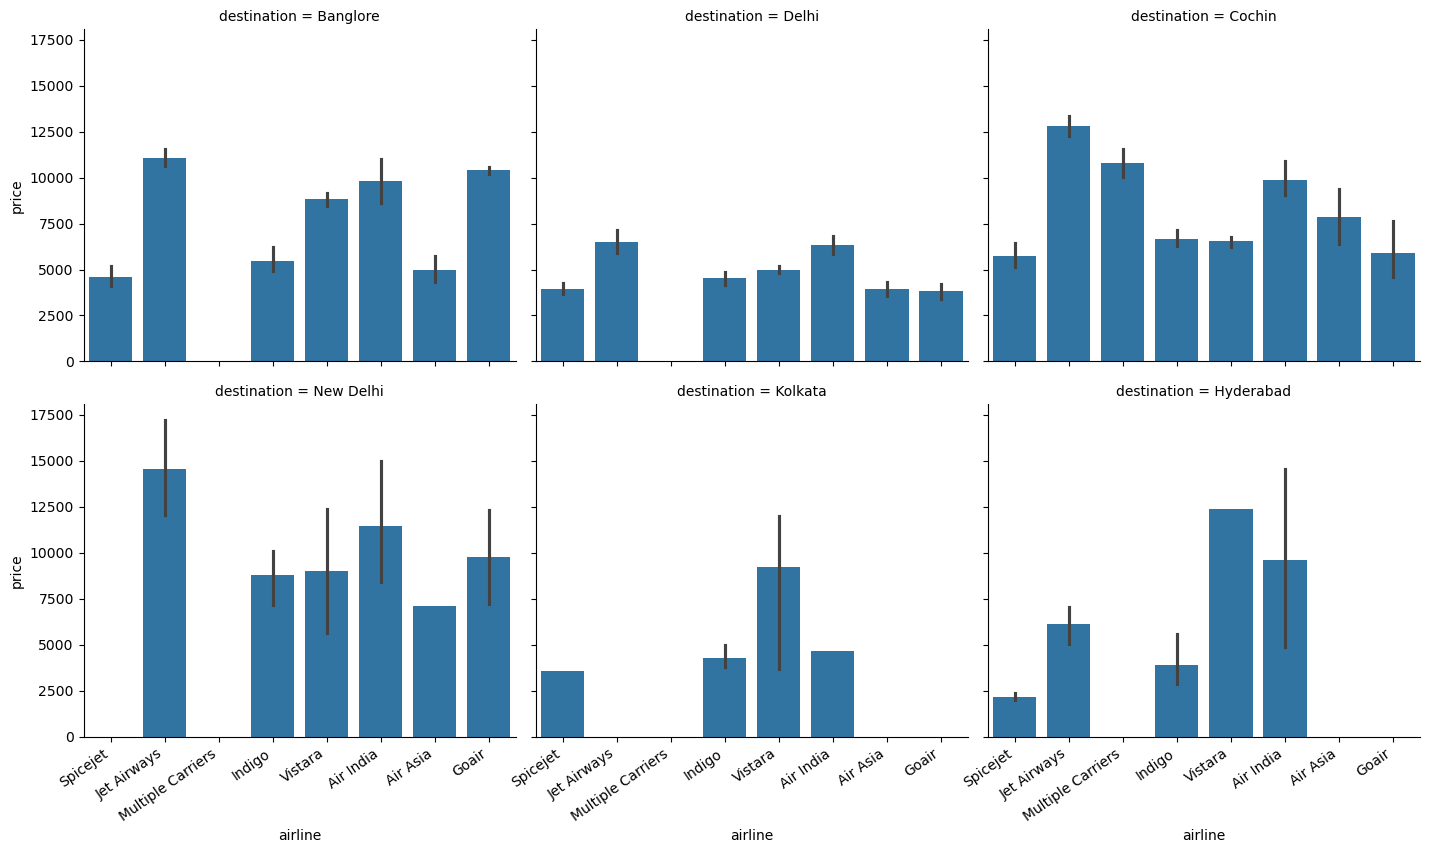

In [61]:
airline_grid = sns.FacetGrid(
    data=train,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.2
    ##sharey=True
)
airline_grid.map(sns.barplot,"airline","price",order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### 8.2 date_of_journey

In [62]:
train.date_of_journey

0     2019-06-03
1     2019-06-12
2     2019-04-06
3     2019-06-15
4     2019-03-24
         ...    
635   2019-05-18
636   2019-05-06
637   2019-05-18
638   2019-03-24
639   2019-06-06
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

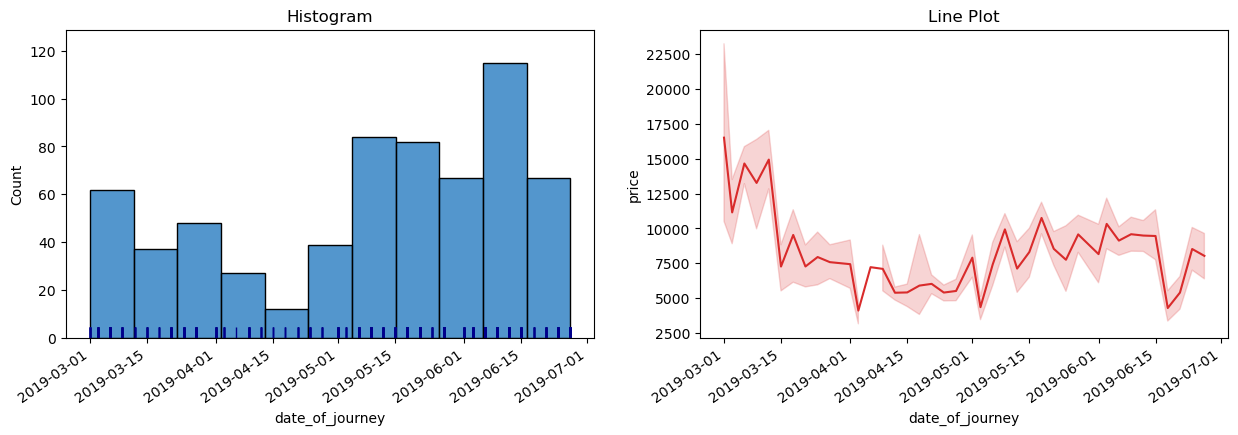

In [63]:
eda_helper_functions.dt_univar_plots(train,"date_of_journey","price")

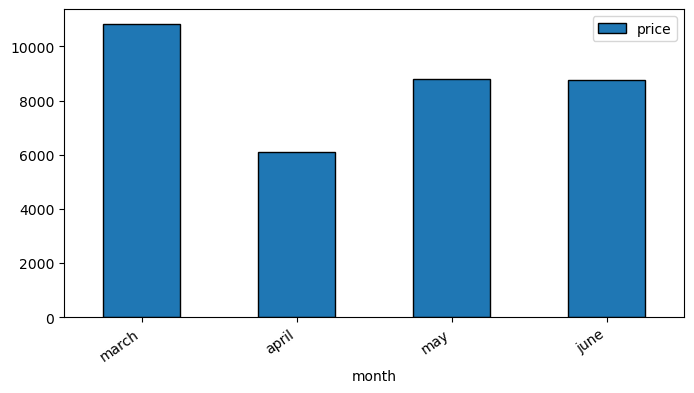

In [64]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey",freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["march","april","may","june"],axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="black"
    )
)
ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)

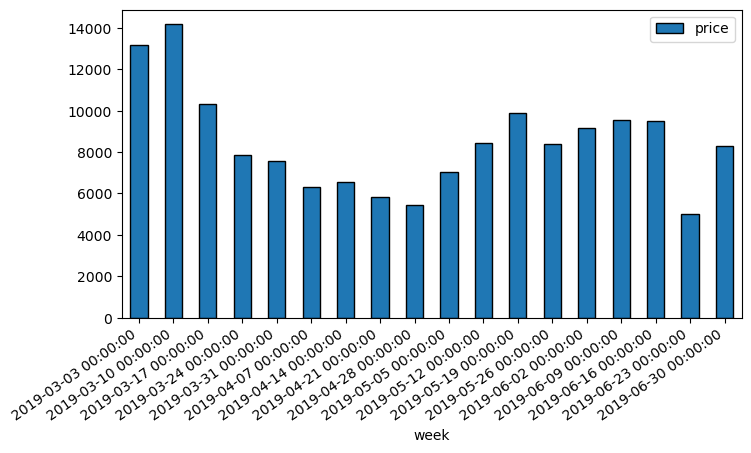

In [65]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey",freq="W"))
    .price.mean()
    .to_frame()
    .rename_axis(index="week")
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="black"
    )
)
ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)

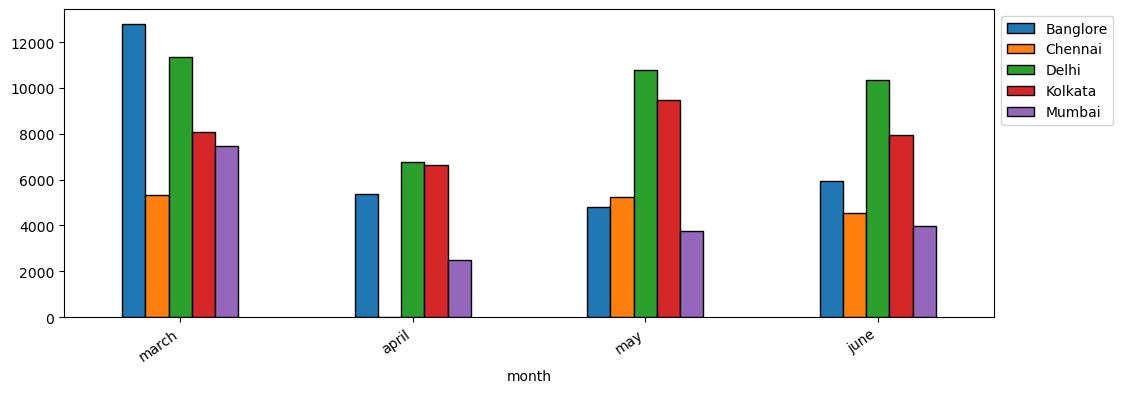

In [66]:
(
    train.groupby([pd.Grouper(key="date_of_journey",freq="M"),"source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["march","april","may","june"],axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(12,4),
        edgecolor="black"
    )
)
ax=plt.gca()
ax.legend(
    loc="upper left",
    bbox_to_anchor=(1,1)
)
eda_helper_functions.rotate_xlabels(ax)

### 8.3 dep_time

In [67]:
train.dep_time

0     2025-09-13 17:10:00
1     2025-09-13 15:05:00
2     2025-09-13 19:50:00
3     2025-09-13 13:00:00
4     2025-09-13 18:55:00
              ...        
635   2025-09-13 20:30:00
636   2025-09-13 17:00:00
637   2025-09-13 11:35:00
638   2025-09-13 16:25:00
639   2025-09-13 05:55:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

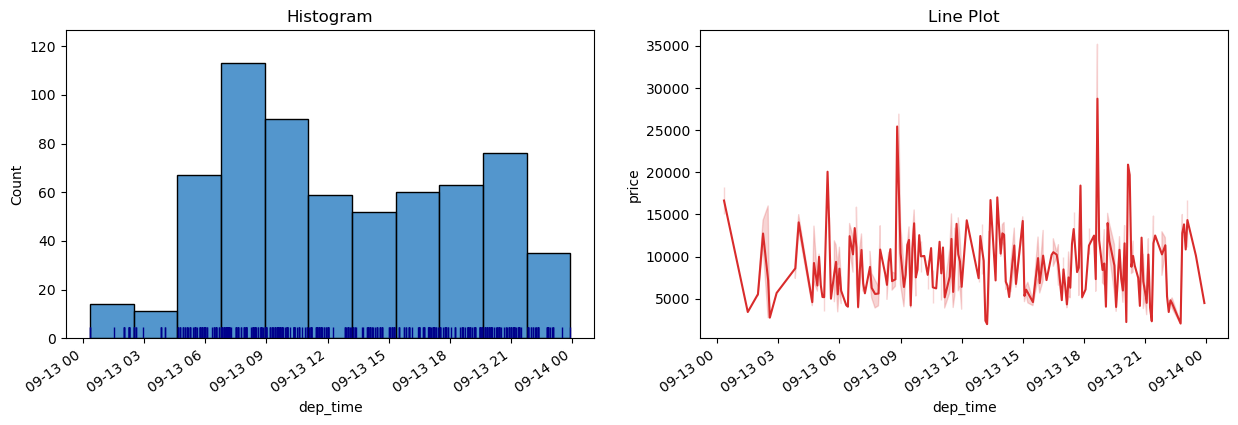

In [68]:
eda_helper_functions.dt_univar_plots(train,"dep_time","price")

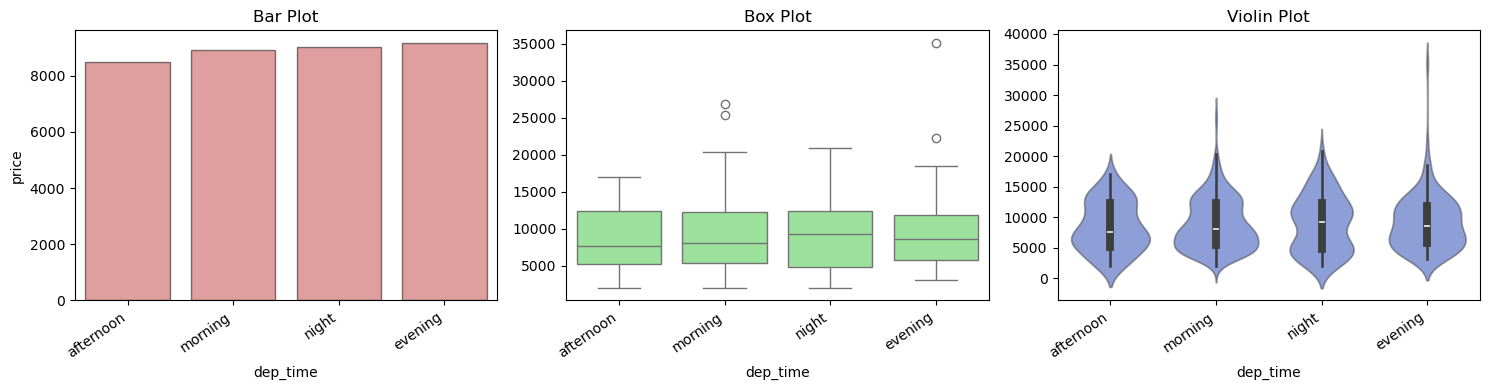

In [69]:
(
    train
    .assign(dep_time = lambda df_:(
        np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                  df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                  df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                  ["morning","afternoon","evening"],
                  default="night")))
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","dep_time")
            
        )


### 8.4 duration

In [70]:
train.duration

0       150
1       315
2       180
3       375
4      1285
       ... 
635    1590
636    1325
637     435
638     460
639     800
Name: duration, Length: 640, dtype: int64

In [71]:
eda_helper_functions.num_summary(train,"duration")

0       150
1       315
2       180
3       375
4      1285
       ... 
635    1590
636    1325
637     435
638     460
639     800
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,140.00
25,170.00
50,502.50
75,886.25
90,1396.50
95,1570.00
99,1798.05


,value
mean,623.710938
trimmed mean (5%),590.538194
trimmed mean (10%),563.818359
median,502.500000


,value
var,242091.019598
std,492.027458
IQR,716.250000
mad,337.500000
coef_variance,0.788871


,value
skewness,0.933801
kurtosis,0.245650


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 5.18300741862718e-21
Test Statistic       : 0.8893375303312993
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 22.380868418412774
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [72]:
train.duration.quantile([0.25,0.5,0.75])

0.25    170.00
0.50    502.50
0.75    886.25
Name: duration, dtype: float64

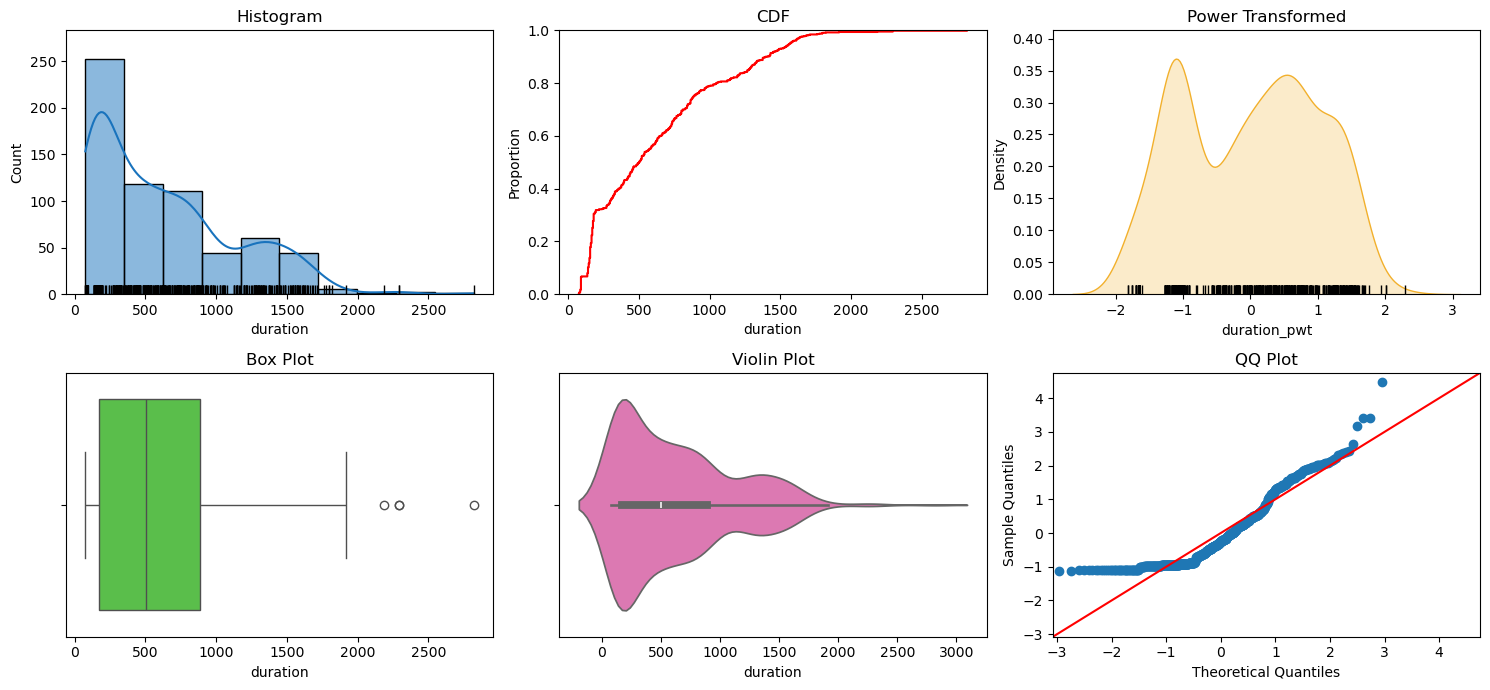

In [73]:
eda_helper_functions.num_univar_plots(train,"duration")

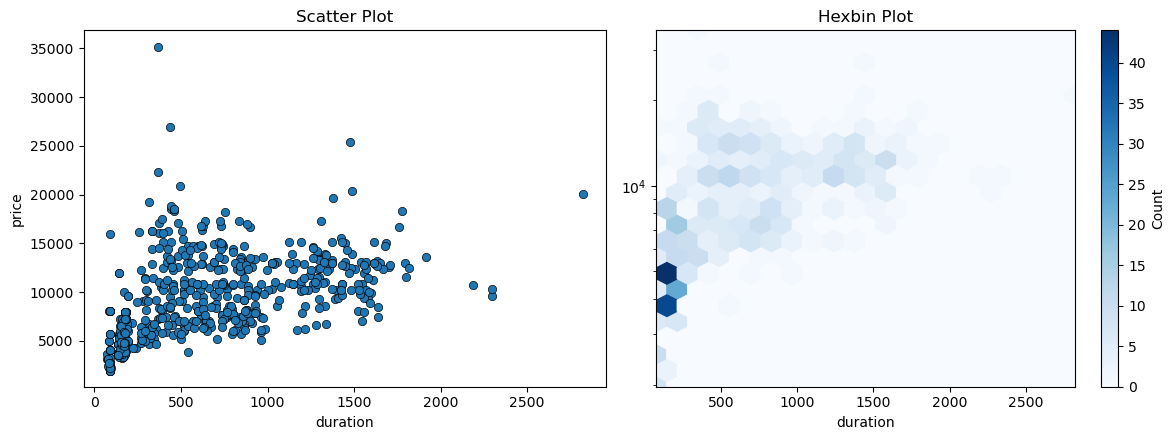

In [74]:
eda_helper_functions.num_bivar_plots(train,"duration","price",
                                    hexbin_kwargs=dict(
                                        yscale="log",
                                        gridsize=20,
                                        cmap="Blues"
                                    ))

In [75]:
eda_helper_functions.num_num_hyp_testing(train,"price","duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5412418476871619
- p-value              : 5.49995060625418e-50
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6954114675028862
- p-value              : 1.2582882505860186e-93
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


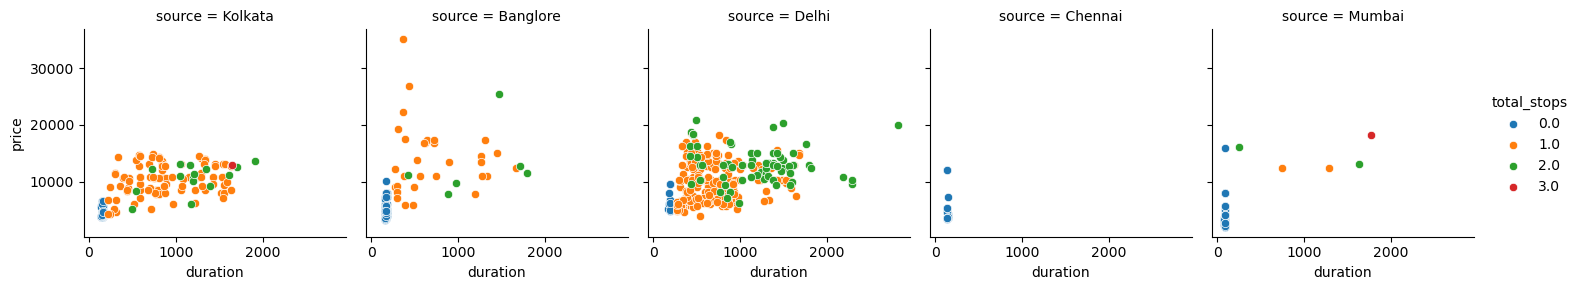

In [76]:
duration_grid=sns.FacetGrid(
    data=train,
    col="source",
    sharey=True,
    hue="total_stops"
)
duration_grid.map(sns.scatterplot,"duration","price")
duration_grid.add_legend()

In [81]:
eda_helper_functions.get_iqr_outliers(train,"duration")

Lower Limit : -904.375
Upper Limit : 1960.625


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
596,Air India,2019-03-21,Delhi,Cochin,2025-09-13 06:50:00,2025-09-13 19:15:00,2185,2.0,No Info,10756
74,Air India,2019-06-06,Delhi,Cochin,2025-09-13 05:00:00,2025-09-13 19:15:00,2295,2.0,No Info,9653
484,Air India,2019-03-03,Delhi,Cochin,2025-09-13 05:00:00,2025-09-13 19:15:00,2295,2.0,No Info,10283
613,Jet Airways,2019-03-03,Delhi,Cochin,2025-09-13 05:25:00,2025-09-13 04:25:00,2820,2.0,No Info,20064


## 9. Automated EDA

In [79]:
from ydata_profiling import ProfileReport

ModuleNotFoundError: No module named 'ydata_profiling'

In [80]:
report = ProfileReport(train)

NameError: name 'ProfileReport' is not defined